<a href="https://colab.research.google.com/github/sanjanagarai/Dynamic_Portfolio_Optimization/blob/main/NBI_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy.optimize import minimize
import pandas as pd
import matplotlib.pyplot as plt

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.5550807467112996
       x: [ 3.279e-01  5.293e-01 -2.672e-01 -1.311e-01 -2.808e-01]
     nit: 7
     jac: [ 6.558e-01  1.059e+00 -5.343e-01 -2.621e-01 -5.617e-01]
    nfev: 44
    njev: 7
weights:  1.0 0.0
0.5550807467112996
F2:  2.131300748002664
**********************************************************
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.6324236795583982
       x: [ 3.195e-01  5.106e-01 -2.776e-01 -1.388e-01 -3.123e-01]
     nit: 6
     jac: [ 7.570e-01  1.070e+00 -5.442e-01 -2.636e-01 -5.934e-01]
    nfev: 36
    njev: 6
weights:  0.95 0.050000000000000044
0.5566442431295089
F2:  2.0722329717072925
**********************************************************
 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.7064570458664083
       x: [ 3.097e-01  4.898e-01 -2.892e-01 -1.472e-01 -3.478e-01]
     nit: 6
     jac: [ 8

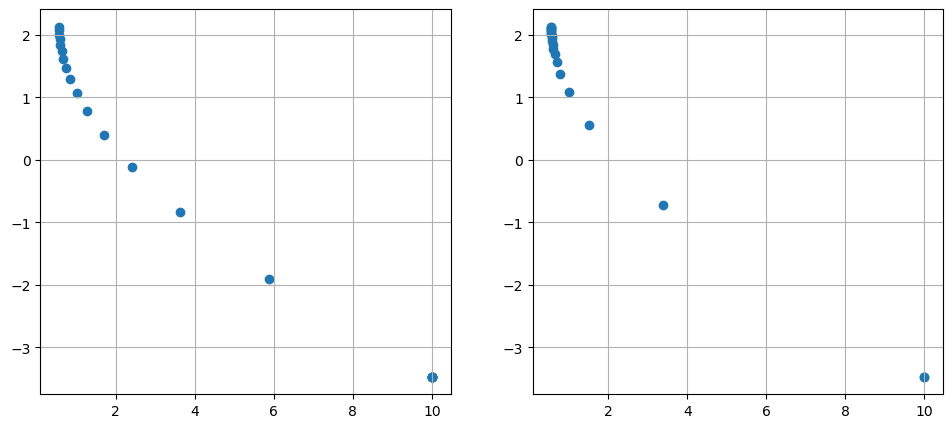

In [ ]:
#SOLUTION USING CONVEX OPTIMIZATION

def objective2(x):
    global a1, a2
    return (a1*(x[0]**2 + x[1]**2 + x[2]**2 + x[3]**2 + x[4]**2)) + a2*(3*x[0] + 2*x[1] - x[2]/3 + 0.01*(x[3]-x[4])**3)

def objective5(x):
    global a1, a2
    return (5*a1*(x[0]**2 + x[1]**2 + x[2]**2 + x[3]**2 + x[4]**2)) + a2*(3*x[0] + 2*x[1] - x[2]/3 + 0.01*(x[3]-x[4])**3)

def objective6(x):
    global a1, a2
    return (10*a1*(x[0]**2 + x[1]**2 + x[2]**2 + x[3]**2 + x[4]**2)) + a2*(3*x[0] + 2*x[1] - x[2]/3 + 0.01*(x[3]-x[4])**3)

def objective3(x):
    return x[0]**2 + x[1]**2 + x[2]**2 + x[3]**2 + x[4]**2

def objective4(x):
    return 3*x[0] + 2*x[1] - x[2]/3 + 0.01*(x[3]-x[4])**3

def constraint3(x):
    return (2 - x[0]-2*x[1]+x[2]+0.5*x[3]+x[4])

def constraint4(x):
    return (4*x[0] - 2*x[1] + 0.8*x[2] + 0.6*x[3] + 0.5*x[4]**2)

def constraint5(x):
    sum_sq=10
    for i in range(5):
        sum_sq-=x[i]**2
    return sum_sq

con3 = {'type': 'eq', 'fun':constraint3}
con4 = {'type': 'eq', 'fun':constraint4}
con5 = {'type': 'ineq', 'fun':constraint5}
cons2 = [con3, con4, con5]

X1=[]
Y1=[]
for i in range(21):
    a1=1-(0.05*i)
    a2=1-a1
    x1=[1,2,3,4,5]
    b=(-4, 4)
    bnds = (b,b,b,b,b)
    sol1 = minimize(objective2, x1, method='SLSQP',bounds= bnds , constraints=cons2)
    print(sol1)
    print("weights: ", a1, a2)
    X1.append(objective3(sol1.x))
    print(objective3(sol1.x))
    print("F2: ", objective4(sol1.x))
    Y1.append(objective4(sol1.x))
    print("**********************************************************")

X2=[]
Y2=[]
print("FEATURE SCALING")

for i in range(21):
    a1=1-(0.05*i)
    a2=1-a1
    x1=[1,2,3,4,5]
    b=(-4, 4)
    bnds = (b,b,b,b,b)
    sol1 = minimize(objective5, x1, method='SLSQP',bounds= bnds , constraints=cons2)
    print("weights: ", a1, a2)
    print("F1: ", objective3(sol1.x))
    X2.append(objective3(sol1.x))
    print("F2: ", objective4(sol1.x))
    Y2.append(objective4(sol1.x))
    print("**********************************************************")

X3=[]
Y3=[]
print("FEATURE SCALING")

for i in range(21):
    a1=1-(0.05*i)
    a2=1-a1
    x1=[1,2,3,4,5]
    b=(-4, 4)
    bnds = (b,b,b,b,b)
    sol1 = minimize(objective6, x1, method='SLSQP',bounds= bnds , constraints=cons2)
    print("weights: ", a1, a2)
    print("F1: ", objective3(sol1.x))
    X3.append(objective3(sol1.x))
    print("F2: ", objective4(sol1.x))
    Y3.append(objective3(sol1.x))
    print("**********************************************************")

plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.scatter(X1, Y1)
plt.grid()
plt.subplot(1,3,2)
plt.scatter(X2, Y2)
plt.grid()

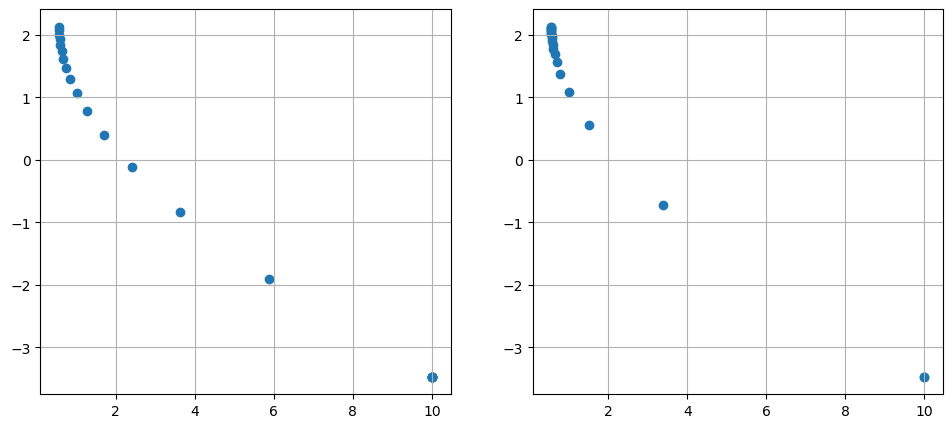

In [ ]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.scatter(X1, Y1)
plt.grid()
plt.subplot(1,3,2)
plt.scatter(X2, Y2)
plt.grid()

In [ ]:
x1=[1,2,3,4,5]
b=(-4, 4)
bnds = (b,b,b,b,b)
sol1 = minimize(objective2, x1, method='SLSQP',bounds= bnds , constraints=cons2)
print(sol1)
print(objective3(sol1.x))

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -3.469614183933577
       x: [-9.336e-01 -5.123e-01 -8.223e-01 -7.470e-01 -2.763e+00]
     nit: 12
     jac: [ 3.000e+00  2.000e+00 -3.333e-01  1.219e-01 -1.219e-01]
    nfev: 72
    njev: 12
10.000000182169828


In [ ]:
print(X1)
print(Y1)

[0.5550807467112996, 0.5566442431295089, 0.5621451749771418, 0.5731146779274964, 0.5920774332655312, 0.6222219479612534, 0.668887958279728, 0.7400407348736846, 0.8484412992355554, 1.0150229520977387, 1.2758968095583394, 1.6953017162865447, 2.394527221378958, 3.6144090669521165, 5.864472084707339, 10.000000005563404, 10.000000655828813, 10.000000000000155, 10.00000008956176, 10.000000010619967, 10.000000182169828]
[2.131300748002664, 2.0722329717072925, 2.005263883869807, 1.9290643107230485, 1.8402164291114684, 1.736971709387754, 1.6145691843919934, 1.4675299561297213, 1.2877882088276116, 1.063628191759879, 0.7769851043855791, 0.40001484439803753, -0.11291757069185324, -0.838391556843484, -1.9102309537726598, -3.4696141266278704, -3.469614340178396, -3.46961412491129, -3.4696141547254093, -3.469614128331092, -3.469614183933577]


In [ ]:
X=[3.097e-01,  4.898e-01, -2.892e-01, -1.472e-01, -3.478e-01]
sum=0
for i in X:
    sum+=i**2
print(sum)

0.5620874499999999


X1* = [-9.336e-01 -5.123e-01 -8.223e-01 -7.470e-01 -2.763e+00]

In [ ]:
sum=0
for i in sol1.x:
    sum+=i**2
print(sum)

10.000000182169828


In [ ]:
#SOLUTION USING NBI METHOD

#finding the individual minima
x1=[1,2,3,4,5]
b=(-4, 4)
bnds = (b,b,b,b,b)
sol2 = minimize(objective3, x1, method='SLSQP',bounds= bnds , constraints=cons2)

print("F1* = ", "(",sol2.fun, ",", objective4(sol2.x), ")")
sol3 = minimize(objective4, x1, method='SLSQP',bounds= bnds , constraints=cons2)
print("F2* = ", "(", objective3(sol3.x), ",", sol3.fun, ")")

print("utopian point: ", "(",sol2.fun, ",", sol3.fun, ")")

F1* =  ( 0.5550807467112996 , 2.131300748002664 )
F2* =  ( 10.000000182169828 , -3.469614183933577 )
utopian point:  ( 0.5550807467112996 , -3.469614183933577 )


## NBI SUBPROBLEM

In [ ]:
def obj1(x):
    return -x[5]

def con1(x):
    global a1
    return (1-a1)*9.45 + x[5]*(-0.54) - (x[0]**2 + x[1]**2 + x[2]**2 + x[3]**2 + x[4]**2) + 0.55

def con2(x):
    return a1*6.14 + x[5]*(-0.84) - (3*x[0] + 2*x[1] - x[2]/3 + 0.01*(x[3]-x[4])**3) - 4.01

def con3(x):
    return (2 - x[0]-2*x[1]+x[2]+0.5*x[3]+x[4])

def con4(x):
    return (4*x[0] - 2*x[1] + 0.8*x[2] + 0.6*x[3] + 0.5*x[4]**2)

def con5(x):
    sum_sq=10
    for i in range(5):
        sum_sq-=x[i]**2
    return sum_sq

def objective3(x):
    return x[0]**2 + x[1]**2 + x[2]**2 + x[3]**2 + x[4]**2

def objective4(x):
    return 3*x[0] + 2*x[1] - x[2]/3 + 0.01*(x[3]-x[4])**3

cons1 = {'type': 'eq', 'fun':con1}
cons2 = {'type': 'eq', 'fun':con2}
cons3 = {'type': 'eq', 'fun':con3}
cons4 = {'type': 'eq', 'fun':con4}
cons5 = {'type': 'ineq', 'fun':con5}
constraint = [cons1, cons2, cons3, cons4, cons5]


a1=0.95
x1=[1,2,3,4,5,6]
b=(-10e100, 10e100)
bnds = (b,b,b,b,b,b)

X1=[]
Y1=[]

a1=1
for i in range(0,21):
    a1=1-(0.05*i)
    print(i+1, "----------------------------------------------------------")
    sol1 = minimize(obj1, x1, method='SLSQP',bounds= (bnds) , constraints=constraint)
    print("a1: ", a1, "a2: ", 1-a1)
    X1.append(objective3(sol1.x))
    Y1.append(objective4(sol1.x))
    print("Point on the cartesian plane: ", objective3(sol1.x), ", ", objective4(sol1.x))

1 ----------------------------------------------------------
a1:  1.0 a2:  0.0
Point on the cartesian plane:  0.5551005971119948 ,  2.1379342560627914
2 ----------------------------------------------------------
a1:  0.95 a2:  0.050000000000000044
Point on the cartesian plane:  0.7650305309841857 ,  1.4224912905594553
3 ----------------------------------------------------------
a1:  0.9 a2:  0.09999999999999998
Point on the cartesian plane:  1.1232219802660048 ,  0.9376785604413092
4 ----------------------------------------------------------
a1:  0.85 a2:  0.15000000000000002
Point on the cartesian plane:  1.5346885983562726 ,  0.5357378196464435
5 ----------------------------------------------------------
a1:  0.8 a2:  0.19999999999999996
Point on the cartesian plane:  1.9764682799391917 ,  0.18095065759646842
6 ----------------------------------------------------------
a1:  0.75 a2:  0.25
Point on the cartesian plane:  2.4386116264595286 ,  -0.14215969940598736
7 --------------------

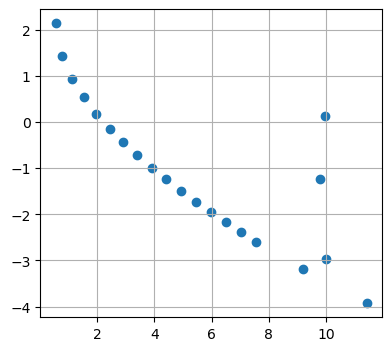

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.scatter(X1, Y1)
plt.grid()

## DTLZ 5 optimization problem

In [ ]:
from math import *

In [ ]:
print(pi)

3.141592653589793


## function 1

In [ ]:
import numpy as np

# Define the objective function
def objective_function1(x):
    pi = np.pi
    return (x[1]**2 - x[1] + 1.25) * np.cos((pi**2/8) * (1 + 2 * x[1]**2 * x[0] - 2 * x[0] * x[1] + 2.5 * x[0]) / (x[1]**2 - x[1] + 1.25)) * np.cos((pi**2/8) * (1 + 2 * x[1]**3 - 2 * x[0]**2 + 2.5 * x[1]) / (x[1]**2 - x[1] + 1.25))

# Define the constraints
constraints = ({'type': 'ineq', 'fun': lambda x: x[0] - 0},
               {'type': 'ineq', 'fun': lambda x: 1 - x[0]},
               {'type': 'ineq', 'fun': lambda x: x[1] - 0},
               {'type': 'ineq', 'fun': lambda x: 1 - x[1]},
               {'type': 'ineq', 'fun': lambda x: x[2] - 0},
               {'type': 'ineq', 'fun': lambda x: 1 - x[2]})
# Initial guess
x0 = np.array([0.1, 0.2, 0.3])

# Perform the optimization
result = minimize(objective_function1, x0, constraints=constraints)
optimum_x1=result.x

# Print the result
if result.success:
    print("Optimal solution found:")
    print("x =", result.x)
    print("Minimum value of the objective function =", result.fun)
else:
    print("Optimization failed:", result.message)


Optimal solution found:
x = [-1.36874676e-17  5.18500048e-01  3.00000000e-01]
Minimum value of the objective function = -0.33106623916685146


In [ ]:
def objective_function2(x):
    pi = np.pi
    return (x[1]**2 - x[1] + 1.25) * np.cos((pi**2/8) * (1 + 2 * x[1]**2 * x[0] - 2 * x[0] * x[1] + 2.5 * x[0]) / (x[1]**2 - x[1] + 1.25)) * np.sin((pi**2/8) * (1 + 2 * x[1]**3 - 2 * x[0]**2 + 2.5 * x[1]) / (x[1]**2 - x[1] + 1.25))

# Define the constraints
constraints = ({'type': 'ineq', 'fun': lambda x: x[0] - 0},
               {'type': 'ineq', 'fun': lambda x: 1 - x[0]},
               {'type': 'ineq', 'fun': lambda x: x[1] - 0},
               {'type': 'ineq', 'fun': lambda x: 1 - x[1]},
               {'type': 'ineq', 'fun': lambda x: x[2] - 0},
               {'type': 'ineq', 'fun': lambda x: 1 - x[2]})
# Initial guess
x0 = np.array([0.1, 0.2, 0.3])

# Perform the optimization
result = minimize(objective_function2, x0, constraints=constraints)
optimum_x2=result.x

# Print the result
if result.success:
    print("Optimal solution found:")
    print("x =", result.x)
    print("Minimum value of the objective function =", result.fun)
else:
    print("Optimization failed:", result.message)


Optimal solution found:
x = [0.7704871  0.48921944 0.3       ]
Minimum value of the objective function = -1.0000830402948906


In [ ]:
def objective_function3(x):
    pi = np.pi
    return (x[1]**2 - x[1] + 1.25) * np.sin((pi**2/8) * (1 + 2 * x[1]**2 * x[0] - 2 * x[0] * x[1] + 2.5 * x[0]) / (x[1]**2 - x[1] + 1.25))

# Define the constraints
constraints = ({'type': 'ineq', 'fun': lambda x: x[0] - 0},
               {'type': 'ineq', 'fun': lambda x: 1 - x[0]},
               {'type': 'ineq', 'fun': lambda x: x[1] - 0},
               {'type': 'ineq', 'fun': lambda x: 1 - x[1]},
               {'type': 'ineq', 'fun': lambda x: x[2] - 0},
               {'type': 'ineq', 'fun': lambda x: 1 - x[2]})
# Initial guess
x0 = np.array([0.1, 0.2, 0.3])

# Perform the optimization
result = minimize(objective_function3, x0, constraints=constraints)
optimum_x3 = result.x

# Print the result
if result.success:
    print("Optimal solution found:")
    print("x =", result.x)
    print("Minimum value of the objective function =", result.fun)
else:
    print("Optimization failed:", result.message)


Optimal solution found:
x = [2.52027390e-16 5.00052243e-01 3.00000000e-01]
Minimum value of the objective function = 0.9437192107903601


# Finding the CHIM complex

In [ ]:
vertex1=[objective_function1(optimum_x1), objective_function2(optimum_x1),objective_function3(optimum_x1)]
print("Vertex 1: ", vertex1[0], ",", vertex1[1], ",", vertex1[2])

Vertex 1:  -0.09999998533683807 , 17.036852910980084 , 1.0431342587307009


In [ ]:
vertex2=[objective_function1(optimum_x2), objective_function2(optimum_x2),objective_function3(optimum_x2)]
print("Vertex 2: ", vertex2[0], ",", vertex2[1], ",", vertex2[2])

Vertex 2:  -0.0042738692826683345 , -1.0000830402948906 , 0.006935488890440051


In [ ]:
vertex3=[objective_function1(optimum_x3), objective_function2(optimum_x3),objective_function3(optimum_x3)]
print("Vertex 3: ", vertex3[0], ",", vertex3[1], ",", vertex3[2])

Vertex 3:  -0.33020899549278965 , 0.018869974551904485 , 0.9437192107903601


Hence, the CHIM simplex is a traingle with vertices as Vertex 1, Vertex 2 and Vertex 3

# Finding the normal to the CHIM simplex

In [ ]:
side1=[]
side2=[]
for i in range(0,3):
    side1.append(vertex1[i]-vertex2[i])
    side2.append(vertex3[i]-vertex2[i])
print(side1)
print(side2)

[-0.32679236988418314, 0.9887733185588204, 0.9369669722593289]
[-0.32593512621012133, 1.0189530148467951, 0.9367837218999201]


In [ ]:
area=[]
area.append(side1[0]*side2[1] - side2[0]*side1[1])
area.append(-side1[0]*side2[2] + side2[0]*side1[2])
area.append(side1[1]*side2[2] - side2[1]*side1[2])
print(area)


[-0.010710114144747762, 0.0007433241905408505, -0.028458571720649473]


In [ ]:
sum=0
for i in range(0,3):
    sum+=area[i]**2
area_value=sum**0.5

In [ ]:
normal_vector=[]
for i in range(0,3):
    normal_vector.append((0.5*area[i])/area_value)
print(normal_vector)

[-0.1760589764360125, 0.012219187804915016, -0.4678182641429168]


The above is the normal vector to the CHIM

# Making the payoff matrix

In [ ]:
payoffmatrix=[0, objective_function2(optimum_x1)-objective_function2(optimum_x2), objective_function3(optimum_x1)-objective_function3(optimum_x3), objective_function1(optimum_x2)-objective_function1(optimum_x1), 0,objective_function3(optimum_x2)-objective_function3(optimum_x3), objective_function1(optimum_x3)-objective_function1(optimum_x1), objective_function2(optimum_x3)-objective_function2(optimum_x2), 0]
print("PAYOFF MATRIX")
for i in range(0,9,3):
    for j in range(0,3):
        print(payoffmatrix[i+j],end="                    ")
    print(" ")

PAYOFF MATRIX
0                    0.9887733185588204                    0.0001832503594088042                     
0.32679236988418314                    0                    -0.9367837218999201                     
0.0008572436740618139                    1.0189530148467951                    0                     


Normal vector: [-0.1760589764360125, 0.012219187804915016, -0.4678182641429168]

## OPTIMIZATION

In [ ]:
global a1, a2

def main_obj(y):
    return -y[3]

def constraint1(y):
    return a2*0.32679236988418314 + (1-a1-a2)*0.0008572436740618139 + y[3]*-0.1760589764360125 - ((y[1]**2 - y[1] + 1.25) * np.cos((pi**2/8) * (1 + 2 * y[1]**2 * y[0] - 2 * y[0] * y[1] + 2.5 * y[0]) / (y[1]**2 - y[1] + 1.25)) * np.cos((pi**2/8) * (1 + 2 * y[1]**3 - 2 * y[0]**2 + 2.5 * y[1]) / (y[1]**2 - y[1] + 1.25))) + objective_function1(optimum_x1)

def constraint2(y):
    return a1*0.9887733185588204 + (1-a1-a2)*1.0189530148467951 + y[3]*0.012219187804915016 - ((y[1]**2 - y[1] + 1.25) * np.cos((pi**2/8) * (1 + 2 * y[1]**2 * y[0] - 2 * y[0] * y[1] + 2.5 * y[0]) / (y[1]**2 - y[1] + 1.25)) * np.sin((pi**2/8) * (1 + 2 * y[1]**3 - 2 * y[0]**2 + 2.5 * y[1]) / (y[1]**2 - y[1] + 1.25))) + objective_function2(optimum_x2)

def constraint3(y):
    return a1*0.0001832503594088042 + a2*-0.9367837218999201 + y[3]*-0.4678182641429168 - ((y[1]**2 - y[1] + 1.25) * np.sin((pi**2/8) * (1 + 2 * y[1]**2 * y[0] - 2 * y[0] * y[1] + 2.5 * y[0]) / (y[1]**2 - y[1] + 1.25))) + objective_function3(optimum_x3)

cons1 = {'type': 'eq', 'fun':constraint1}
cons2 = {'type': 'eq', 'fun':constraint2}
cons3 = {'type': 'eq', 'fun':constraint3}

constraint = [cons1, cons2, cons3]
x1=[0.1,0.2,0.3,0.4]
x1_bounds = (0, 1)
x2_bounds = (0, 1)
x3_bounds = (0, 1)
x4_bounds = (-10e5, 10e5)

# Combine the bounds into a list
bounds = [x1_bounds, x2_bounds, x3_bounds, x4_bounds]

a1=0.05
a2=0.05
x1=[0.1,0.2,0.3,0.4]
#sol1 = minimize(main_obj, x1, method='SLSQP',bounds= bounds , constraints=constraint)
#print(sol1.x)

X1=[]
Y1=[]
Z1=[]

a1=0
for i in range(0,5):
    a2=0.1*i
    a3=1-a2
    print(i+1, "----------------------------------------------------------")
    sol1 = minimize(main_obj, x1, method='SLSQP',bounds= bounds , constraints=constraint)
    print("a1: ", a1, "a2: ", a2, "a3: ", a3)
    X1.append(objective_function1(sol1.x))
    Y1.append(objective_function2(sol1.x))
    Z1.append(objective_function3(sol1.x))
    print("Point on the cartesian plane: ", objective_function1(sol1.x), ", ", objective_function2(sol1.x), ", ", objective_function3(sol1.x))

a2=0
for i in range(0,5):
    a1=0.1*i
    a3=1-a1
    print(i+1, "----------------------------------------------------------")
    sol1 = minimize(main_obj, x1, method='SLSQP',bounds= bounds , constraints=constraint)
    print("a1: ", a1, "a2: ", a2, "a3: ", a3)
    X1.append(objective_function1(sol1.x))
    Y1.append(objective_function2(sol1.x))
    Z1.append(objective_function3(sol1.x))
    print("Point on the cartesian plane: ", objective_function1(sol1.x), ", ", objective_function2(sol1.x), ", ", objective_function3(sol1.x))

a3=0
for i in range(0,5):
    a1=0.1*i
    a2=1-a1
    print(i+1, "----------------------------------------------------------")
    sol1 = minimize(main_obj, x1, method='SLSQP',bounds= bounds , constraints=constraint)
    print("a1: ", a1, "a2: ", a2, "a3: ", a3)
    X1.append(objective_function1(sol1.x))
    Y1.append(objective_function2(sol1.x))
    Z1.append(objective_function3(sol1.x))
    print("Point on the cartesian plane: ", objective_function1(sol1.x), ", ", objective_function2(sol1.x), ", ", objective_function3(sol1.x))

1 ----------------------------------------------------------
a1:  0 a2:  0.0 a3:  1.0
Point on the cartesian plane:  -0.33020899547906546 ,  0.01886997452210807 ,  0.9437192107957599
2 ----------------------------------------------------------
a1:  0 a2:  0.1 a3:  0.9
Point on the cartesian plane:  -0.25242413421174986 ,  -0.08616188259249348 ,  0.9701212349856855
3 ----------------------------------------------------------
a1:  0 a2:  0.2 a3:  0.8
Point on the cartesian plane:  -0.11220554864995887 ,  -0.19552668820745575 ,  1.162421048004368
4 ----------------------------------------------------------
a1:  0 a2:  0.30000000000000004 a3:  0.7
Point on the cartesian plane:  -0.0758612909333933 ,  -0.29768225408295673 ,  1.0787089929566818
5 ----------------------------------------------------------
a1:  0 a2:  0.4 a3:  0.6
Point on the cartesian plane:  -0.033712599274688115 ,  -0.4002407768744469 ,  1.0104206959366855
1 ----------------------------------------------------------
a1:  0

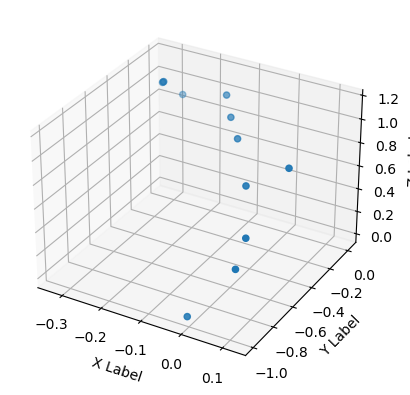

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X1, Y1, Z1)

# Customize labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Show the plot
plt.show()

## OSYCZA AND KUNDU PROBLEM

In [ ]:
# Define the objective function
def objective_function1(x):
    return (-25*(x[0]-2)**2 - (x[1]-2)**2 - (x[2]-1)**2 -(x[3]-4)**2 - (x[4]-1)**2)

def constraint1(x):
    return x[0]+x[1]-2

def constraint2(x):
    return 6-x[0]-x[1]

def constraint3(x):
    return 2-x[1]-x[0]

def constraint4(x):
    return 2-x[0]+3*x[1]

def constraint5(x):
    return 4-(x[2]-3)**2 - x[3]

def constraint6(x):
    return (x[4]-3)**2 + x[5] - 4

# Define the constraints
constraints = ({'type': 'ineq', 'fun': constraint1},
               {'type': 'ineq', 'fun': constraint2},
               {'type': 'ineq', 'fun': constraint3},
               {'type': 'ineq', 'fun': constraint4},
               {'type': 'ineq', 'fun': constraint5},
               {'type': 'ineq', 'fun': constraint6})

x1_bounds = (0, 10)
x2_bounds = (0, 10)
x3_bounds = (1, 5)
x4_bounds = (1, 5)
x5_bounds = (1, 5)
x6_bounds = (0, 10)

# Combine the bounds into a list
bounds = [x1_bounds, x2_bounds, x3_bounds, x4_bounds, x5_bounds, x6_bounds]

# Initial guess
x0 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6])

# Perform the optimization
result = minimize(objective_function1, x0, constraints=constraints, bounds=bounds)
optimum_x1=result.x

# Print the result
if result.success:
    print("Optimal solution found:")
    print("x =", result.x)
    print("Minimum value of the objective function =", result.fun)
else:
    print("Optimization failed:", result.message)

Optimal solution found:
x = [0.         2.         4.73205081 1.         1.         0.6       ]
Minimum value of the objective function = -122.92820324624927


In [ ]:
# Define the objective function
def objective_function2(x):
    return (x[0]**2 + x[1]**2 + x[2]**2 + x[3]**2 + x[4]**2 + x[5]**2)

# Perform the optimization
result = minimize(objective_function2, x0, constraints=constraints, bounds=bounds)
optimum_x2=result.x

# Print the result
if result.success:
    print("Optimal solution found:")
    print("x =", result.x)
    print("Minimum value of the objective function =", result.fun)
else:
    print("Optimization failed:", result.message)

Optimal solution found:
x = [1.00000171e+00 9.99998289e-01 1.26794919e+00 1.00000000e+00
 1.00000000e+00 3.36859393e-07]
Minimum value of the objective function = 5.607695154510781


# Finding the CHIM complex

In [ ]:
vertex1=[objective_function1(optimum_x1), objective_function2(optimum_x1)]
print("Vertex 1: ", vertex1[0], ",", vertex1[1])

Vertex 1:  -122.92820324624927 , 28.75230487035742


In [ ]:
vertex1=[objective_function1(optimum_x2), objective_function2(optimum_x2)]
print("Vertex 1: ", vertex1[0], ",", vertex1[1])

Vertex 1:  -35.071714661609775 , 5.607695154510781


Hence, the CHIM simplex is a line joining the above 2 vertices

# Finding the normal to the CHIM simplex

In [ ]:
slope = vertex1[1]-vertex2[1]/vertex1[0]-vertex1[1]
print("The slope of the line is: ", slope)

The slope of the line is:  -0.028515373426825974


In [ ]:
print("The slope of the normal is: ", -(1/slope))

The slope of the normal is:  35.068802537905576


Hence, the respective unit vectors will be 0.02850378718895100713189941759924 and 0.99959368451180552286328088676736

# Making the payoff matrix

In [ ]:
payoffmatrix=[0, objective_function2(optimum_x1)-objective_function2(optimum_x2), objective_function1(optimum_x2)-objective_function1(optimum_x1), 0]
print("PAYOFF MATRIX")
for i in range(0,4,2):
    for j in range(0,2):
        print(payoffmatrix[i+j],end="                    ")
    print(" ")

PAYOFF MATRIX
0                    23.14460971584664                     
87.8564885846395                    0                     


In [ ]:
global a1

def main_obj(y):
    return -y[6]

def constraint1(y):
    return (1-a1)*87.8564885846395 + y[6]*-0.02850378718895100713189941759924 - (-25*(y[0]-2)**2 - (y[1]-2)**2 - (y[2]-1)**2 -(y[3]-4)**2 - (y[4]-1)**2) - 122.92820324624927

def constraint2(y):
    return a1*23.14460971584664 + y[6]*-0.99959368451180552286328088676736 - (y[0]**2 + y[1]**2 + y[2]**2 + y[3]**2 + y[4]**2 + y[5]**2) + 5.607695154510781

x7_bounds=[-10e20, 10e20]
# Combine the bounds into a list
bounds = [x1_bounds, x2_bounds, x3_bounds, x4_bounds, x5_bounds, x6_bounds, x7_bounds]

cons1 = {'type': 'eq', 'fun':constraint1}
cons2 = {'type': 'eq', 'fun':constraint2}

constraint=[cons1, cons2]
x1=[0.1,0.2,0.3,0.4,0.5,0.6,0.7]

X1=[]
Y1=[]

a1=1
for i in range(0,51):
    a1=1-(0.02*i)
    print(i+1, "----------------------------------------------------------")
    sol1 = minimize(main_obj, x1, method='SLSQP',bounds= bounds , constraints=constraint)
    print("a1: ", a1, "a2: ", 1-a1)
    X1.append(objective_function1(sol1.x))
    Y1.append(objective_function2(sol1.x))
    print("Point on the cartesian plane: ", objective_function1(sol1.x), ", ", objective_function2(sol1.x))

1 ----------------------------------------------------------
a1:  1.0 a2:  0.0
Point on the cartesian plane:  -123.11749256018952 ,  22.114155301495977
2 ----------------------------------------------------------
a1:  0.98 a2:  0.020000000000000018
Point on the cartesian plane:  -121.41815473689886 ,  19.62456914630598
3 ----------------------------------------------------------
a1:  0.96 a2:  0.040000000000000036
Point on the cartesian plane:  -119.72112993404508 ,  17.053867435937605
4 ----------------------------------------------------------
a1:  0.94 a2:  0.06000000000000005
Point on the cartesian plane:  -118.02735525067962 ,  14.369187950063683
5 ----------------------------------------------------------
a1:  0.92 a2:  0.07999999999999996
Point on the cartesian plane:  -116.3389547843751 ,  11.496040464739986
6 ----------------------------------------------------------
a1:  0.9 a2:  0.09999999999999998
Point on the cartesian plane:  -114.65966293486078 ,  8.303466370696555
7 ---

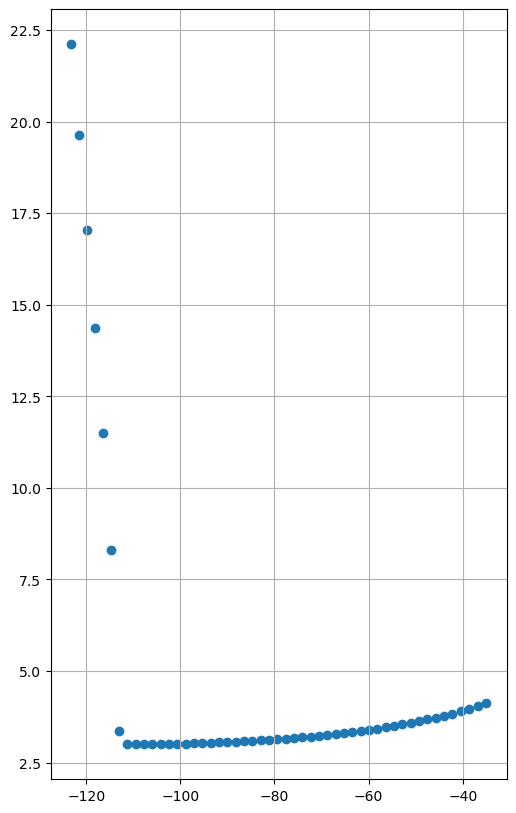

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.scatter(X1, Y1)
plt.grid()

## VIENNET PROBLEM

In [ ]:
# Define the objective function
def objective_function1(x):
    return (0.5*(x[0]**2 + x[1]**2) + np.sin(x[0]**2 + x[1]**2))

# Define the constraints
constraints = ({'type': 'ineq', 'fun': lambda x: x[0] - (-3)},
               {'type': 'ineq', 'fun': lambda x: 3 - x[0]},
               {'type': 'ineq', 'fun': lambda x: x[1] - (-3)},
               {'type': 'ineq', 'fun': lambda x: 3 - x[1]})
# Initial guess
x0 = np.array([0.1, 0.2])

# Perform the optimization
result = minimize(objective_function1, x0, constraints=constraints)
optimum_x1=result.x

# Print the result
if result.success:
    print("Optimal solution found:")
    print("x =", result.x)
    print("Minimum value of the objective function =", result.fun)
else:
    print("Optimization failed:", result.message)


Optimal solution found:
x = [-0.00016559 -0.00033117]
Minimum value of the objective function = 2.0564315539515804e-07


In [ ]:
# Define the objective function
def objective_function2(x):
    return ((3*x[0] - 2*x[1]+4)**2)/8 + (x[0]-x[1]+1)**2/27 + 15

# Define the constraints
constraints = ({'type': 'ineq', 'fun': lambda x: x[0] - (-3)},
               {'type': 'ineq', 'fun': lambda x: 3 - x[0]},
               {'type': 'ineq', 'fun': lambda x: x[1] - (-3)},
               {'type': 'ineq', 'fun': lambda x: 3 - x[1]})
# Initial guess
x0 = np.array([0.1, 0.2])

# Perform the optimization
result = minimize(objective_function2, x0, constraints=constraints)
optimum_x1=result.x

# Print the result
if result.success:
    print("Optimal solution found:")
    print("x =", result.x)
    print("Minimum value of the objective function =", result.fun)
else:
    print("Optimization failed:", result.message)

Optimal solution found:
x = [-2.00000535 -1.00000789]
Minimum value of the objective function = 15.000000000000249


In [ ]:
# Define the objective function
def objective_function3(x):
    return (1/(x[0]**2 + x[1]**2 + 1) - 1.1 * exp(-(x[0]**2 + x[1]**2)))

# Define the constraints
constraints = ({'type': 'ineq', 'fun': lambda x: x[0] - (-3)},
               {'type': 'ineq', 'fun': lambda x: 3 - x[0]},
               {'type': 'ineq', 'fun': lambda x: x[1] - (-3)},
               {'type': 'ineq', 'fun': lambda x: 3 - x[1]})
# Initial guess
x0 = np.array([0.1, 0.2])

# Perform the optimization
result = minimize(objective_function3, x0, constraints=constraints)
optimum_x1=result.x

# Print the result
if result.success:
    print("Optimal solution found:")
    print("x =", result.x)
    print("Minimum value of the objective function =", result.fun)
else:
    print("Optimization failed:", result.message)

Optimal solution found:
x = [0.0001712  0.00034252]
Minimum value of the objective function = -0.09999998533683807


# Finding the CHIM Simplex

In [ ]:
vertex1=[objective_function1(optimum_x1), objective_function2(optimum_x1),objective_function3(optimum_x1)]
print("Vertex 1: ", vertex1[0], ",", vertex1[1], ",", vertex1[2])

Vertex 1:  2.19947285403902e-07 , 17.036852910980084 , -0.09999998533683807


In [ ]:
vertex2=[objective_function1(optimum_x2), objective_function2(optimum_x2),objective_function3(optimum_x2)]
print("Vertex 2: ", vertex2[0], ",", vertex2[1], ",", vertex2[2])

Vertex 2:  1.9092974268261722 , 18.162047981635325 , 0.18446452177328027


In [ ]:
vertex1=[objective_function1(optimum_x3), objective_function2(optimum_x3),objective_function3(optimum_x3)]
print("Vertex 3: ", vertex3[0], ",", vertex3[1], ",", vertex3[2])

Vertex 3:  -0.33020899549278965 , 0.018869974551904485 , 0.9437192107903601


Hence, the CHIM simplex is a triangle joining the above 3 points

## Finding the normal to the CHIM simplex

In [ ]:
side1=[]
side2=[]
for i in range(0,3):
    side1.append(vertex1[i]-vertex2[i])
    side2.append(vertex3[i]-vertex2[i])
print(side1)
print(side2)

[-1.536816723053179, -2.027869020812652, -0.24113406220669703]
[-2.239506422318962, -18.14317800708342, 0.7592546890170799]


In [ ]:
area=[]
area.append(side1[0]*side2[1] - side2[0]*side1[1])
area.append(-side1[0]*side2[2] + side2[0]*side1[2])
area.append(side1[1]*side2[2] - side2[1]*side1[2])
print(area)

[23.34131367488485, 1.7068565840897474, -5.9146072769517115]


In [ ]:
sum=0
for i in range(0,3):
    sum+=area[i]**2
area_value=sum**0.5

In [ ]:
normal_vector=[]
for i in range(0,3):
    normal_vector.append((0.5*area[i])/area_value)
print(normal_vector)

[0.4834682926067039, 0.03535409574321879, -0.1225091749957444]


The above is the normal vector to the CHIM

## Making the payoff matrix

In [ ]:
payoffmatrix=[0, objective_function2(optimum_x1)-objective_function2(optimum_x2), objective_function3(optimum_x1)-objective_function3(optimum_x3), objective_function1(optimum_x2)-objective_function1(optimum_x1), 0,objective_function3(optimum_x2)-objective_function3(optimum_x3), objective_function1(optimum_x3)-objective_function1(optimum_x1), objective_function2(optimum_x3)-objective_function2(optimum_x2), 0]
print("PAYOFF MATRIX")
for i in range(0,9,3):
    for j in range(0,3):
        print(payoffmatrix[i+j],end="                    ")
    print(" ")

PAYOFF MATRIX
0                    -1.1251950706552414                    -0.043330444903421306                     
1.9092972068788867                    0                    0.24113406220669703                     
0.37248048382570764                    -2.027869020812652                    0                     


In [ ]:
global a1, a2

def main_obj(y):
    return -y[2]

def constraint1(y):
    return a2*1.9092972068788867 + (1-a1-a2)*0.37248048382570764 + y[2]*-0.4834682926067039 - (0.5*(y[0]**2 + y[1]**2) + np.sin(y[0]**2 + y[1]**2))  + objective_function1(optimum_x1)

def constraint2(y):
    return a1*-1.1251950706552414 + (1-a1-a2)*-2.027869020812652 + y[2]*-0.03535409574321879 - ((3*y[0] - 2*y[1]+4)**2)/8 + (y[0]-y[1]+1)**2/27 + 15 + objective_function2(optimum_x2)

def constraint3(y):
    return a1*-0.043330444903421306 + a2*0.24113406220669703 + y[2]*0.1225091749957444 - (1/(y[0]**2 + y[1]**2 + 1) - 1.1 * exp(-(y[0]**2 + y[1]**2))) + objective_function3(optimum_x3)

cons1 = {'type': 'eq', 'fun':constraint1}
cons2 = {'type': 'eq', 'fun':constraint2}
cons3 = {'type': 'eq', 'fun':constraint3}

constraint = [cons1, cons2, cons3]
x1_bounds = (-3, 3)
x2_bounds = (-3, 3)
x3_bounds = (-10e5, 10e5)

# Combine the bounds into a list
bounds = [x1_bounds, x2_bounds, x3_bounds]

a1=0.05
a2=0.05
x1=[0.1,0.2, 0.3]

X1=[]
Y1=[]
Z1=[]

a1=0
for i in range(0,20):
    a2=0.05*i
    a3=1-a2
    print(i+1, "----------------------------------------------------------")
    sol1 = minimize(main_obj, x1, method='SLSQP',bounds= bounds , constraints=constraint)
    print("a1: ", a1, "a2: ", a2, "a3: ", a3)
    X1.append(objective_function1(sol1.x))
    Y1.append(objective_function2(sol1.x))
    Z1.append(objective_function3(sol1.x))
    print("Point on the cartesian plane: ", objective_function1(sol1.x), ", ", objective_function2(sol1.x), ", ", objective_function3(sol1.x))

a2=0
for i in range(0,20):
    a1=0.05*i
    a3=1-a1
    print(i+1, "----------------------------------------------------------")
    sol1 = minimize(main_obj, x1, method='SLSQP',bounds= bounds , constraints=constraint)
    print("a1: ", a1, "a2: ", a2, "a3: ", a3)
    X1.append(objective_function1(sol1.x))
    Y1.append(objective_function2(sol1.x))
    Z1.append(objective_function3(sol1.x))
    print("Point on the cartesian plane: ", objective_function1(sol1.x), ", ", objective_function2(sol1.x), ", ", objective_function3(sol1.x))

a3=0
for i in range(0,20):
    a1=0.05*i
    a2=1-a1
    print(i+1, "----------------------------------------------------------")
    sol1 = minimize(main_obj, x1, method='SLSQP',bounds= bounds , constraints=constraint)
    print("a1: ", a1, "a2: ", a2, "a3: ", a3)
    X1.append(objective_function1(sol1.x))
    Y1.append(objective_function2(sol1.x))
    Z1.append(objective_function3(sol1.x))
    print("Point on the cartesian plane: ", objective_function1(sol1.x), ", ", objective_function2(sol1.x), ", ", objective_function3(sol1.x))

1 ----------------------------------------------------------
a1:  0 a2:  0.0 a3:  1.0
Point on the cartesian plane:  4.377618130098624 ,  47.093277439766304 ,  0.0861544245206344
2 ----------------------------------------------------------
a1:  0 a2:  0.05 a3:  0.95
Point on the cartesian plane:  4.3725369195934425 ,  46.97002483167077 ,  0.08656217263479778
3 ----------------------------------------------------------
a1:  0 a2:  0.1 a3:  0.9
Point on the cartesian plane:  4.371428266699547 ,  46.93008188464894 ,  0.08670202573523564
4 ----------------------------------------------------------
a1:  0 a2:  0.15000000000000002 a3:  0.85
Point on the cartesian plane:  4.514958270449123 ,  43.414488855875256 ,  0.09215869164239414
5 ----------------------------------------------------------
a1:  0 a2:  0.2 a3:  0.8
Point on the cartesian plane:  4.648706357109199 ,  42.0677667049808 ,  0.09468309695950346
6 ----------------------------------------------------------
a1:  0 a2:  0.25 a3:  0.

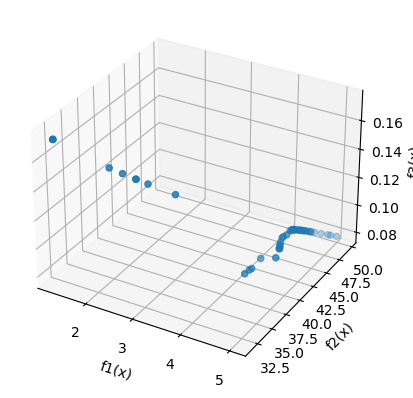

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X1, Y1, Z1)

# Customize labels
ax.set_xlabel('f1(x)')
ax.set_ylabel('f2(x)')
ax.set_zlabel('f3(x)')

# Show the plot
plt.show()